# **Project 4: Gradient Boosting Model**
## **Imports Block**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import balanced_accuracy_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier

from imblearn.over_sampling import RandomOverSampler

In [2]:
# read from github repository
df = pd.read_csv("https://media.githubusercontent.com/media/Rpierre98/DSI-320-Group-Project/main/data/clean_data/cleaned_data.csv")

In [3]:
df.head().T

,0,1,2,3,4
AGE,42,62,64,26,24
STATE,nonmover,nonmover,nonmover,nonmover,nonmover
FAM_RELATIONSHIP,not fam,ref person,spouse,ref person,spouse
OUT_POCKET_NONPREM,0,320,0,0,300
OUT_POCKET_OC,0,48,100,100,100
OCCUPATION,Professional,Business/Finance,Professional,sales,Professional
EDU_LVL,associate degree,high school graduate,bachelor's degree,college no degree,college no degree
MARITAL,single,married/civilian spouse,married/civilian spouse,married/civilian spouse,married/civilian spouse
SEX,male,male,female,male,female
HOUSEHOLD_SUMMARY,householder,householder,spouse of HH,householder,spouse of HH


In [4]:
df.shape

(152732, 52)

In [5]:
df['POV_STS'].value_counts()

0    141584
1     11148
Name: POV_STS, dtype: int64

In [6]:
df['POV_LVL'].value_counts()

150+ percent of poverty level       122387
below poverty level                  17836
125-149 percent of poverty level      6391
100-124 percent of poverty level      5822
not in poverty                         296
Name: POV_LVL, dtype: int64

## **Data Preporation for the Classification Modeling**

In [7]:
# decode all categorical variables back to being numerical for modeling
# get "ValueError: could not convert string to float: 'nonmover'" 
# so, Alana and Eric recommended me to fo this to solve this error

df = df.replace({'STATE' : {'nonmover': 0, 'Alabama': 1, 
                            'Alaska': 2, ' Arizona': 3, 
                            'Arkansas': 4, 'California': 5, 
                            'Colorado': 6, 'Connecticut': 7, 
                            'Delaware': 8, 'District of Columbia': 9, 
                            'Florida': 10, 'Georgia': 11, 
                            'Hawaii': 12, 'Idaho': 13, 
                            'Illinois': 14, 'Indiana': 15, 
                            'Iowa': 16, 'Kansas': 17,
                            'Kentucky': 18, 'Louisiana': 19, 
                            'Maine': 20, 'Maryland': 21,
                            'Massachusetts': 22, 'Michigan': 23, 
                            'Minnesota': 24, 'Mississippi': 25,
                            'Missouri': 26, 'Montana': 27, 
                            'Nebraska': 28, 'Nevada': 29, 
                            'New Hampshire': 30, 'New Jersey': 31, 
                            'New Mexico': 32, 'New York': 33, 
                            'North Carolina': 34, 'North Dakota': 35, 
                            'Ohio': 36, 'Oklahoma': 37, 
                            'Oregon': 38, 'Pennsylvania': 39,
                            'Rhode Island': 40, 'South Carolina': 41, 
                            'South Dakota': 42, 'Tennessee': 43,
                            'Texas': 44, 'Utah': 45, 
                            'Vermont': 46, 'Virginia': 47, 
                            'Washington': 48, 'West Virginia': 49, 
                            'Wisconsin': 50, 'Wyoming': 51, 
                            'Abroad': 52}})

df = df.replace({'FAM_RELATIONSHIP' : {'not fam': 0, 'ref person': 1,
                                       'spouse': 2, 'child': 3, 
                                       'other relatives': 4}})

df = df.replace({'OCCUPATION' : {'none': 0, 'Business/Finance': 1, 'Professional': 2,
                                 'Service': 3, 'sales': 4, 'office': 5,
                                 'farming': 6, 'construction': 7, 'maintenance': 8,
                                 'production': 9, 'transportation': 10, 'military': 11}})

df = df.replace({'EDU_LVL' : {'children': 0, 'preschool': 1, 
                              'elementary school': 2, 'elementary school': 3,
                              'middle school': 4, 'high school no diploma': 5, 
                              'high school no diploma': 6, 'high school no diploma': 7, 
                              'high school no diploma': 8, 'high school graduate': 9,
                              'college no degree': 10, 'associate degree': 11, 
                              'associate degree': 12, "bachelor's degree": 13, 
                              "master's degree": 14, 'professional school degree': 15,
                              'doctorate degree': 16}})

df = df.replace({'MARITAL' : {'married/civilian spouse': 0, 'married/military spouse': 1,
                              'married/estranged': 2, 'widowed': 3,
                              'divorced': 4, 'seperated': 5,
                              'single': 6}})

df = df.replace({'SEX' : {'male': 1, 'female': 2}})

df = df.replace({'HOUSEHOLD_SUMMARY' : {'householder': 0, 'spouse of HH': 1,
                                        'child/never married': 2, 'under 18/ever married': 3,
                                        'over 18': 4, 'relative': 5,
                                        'non-relative': 6, 'group living': 7}})

df = df.replace({'MILITARY' : {'ineligible': 0, 'yes': 1, 'no': 2}})

df = df.replace({'CERT_REQ' : {'none': 0, 'yes': 1, 'no': 2}})

df = df.replace({'TROUB_BATHE' : {'not included': 0, 'yes': 1, 'no': 2}})

df = df.replace({'TROUB_HEAR' : {'none': 0, 'yes': 1, 'no': 2}})

df = df.replace({'TROUB_SEE' : {'none': 0, 'yes': 1, 'no': 2}})

df = df.replace({'TROUB_ALONE' : {'none': 0, 'yes': 1, 'no': 2}})

df = df.replace({'TROUB_WALK' : {'none': 0, 'yes': 1, 'no': 2}})

df = df.replace({'TROUB_CONC' : {'none': 0, 'yes': 1, 'no': 2}})

df = df.replace({'HISPANIC' : {'yes': 1, 'no': 0}})

df = df.replace({'IMMIGR_YR' : {'not immigrant': 0, 'before 1950': 1, '1950s': 2, 
                              '1960s': 3, '1960s': 4, '1970s': 5, '1970s': 6, 
                              '1980s': 7, '1980s': 8, '1980s': 9, '1980s': 10,
                              '1980s': 11, '1990s': 12, '1990s': 13, '1990s': 14, 
                              '1990s': 15, '1990s': 16, '2000s': 17, '2000s': 18, 
                              '2000s': 19, '2000s': 20, '2000s': 21, '2010s': 22,
                              '2010s': 23, '2010s': 23, '2010s': 24, '2010s': 25, 
                              '2020s': 26}})

df = df.replace({'CITIZENSHIP' : {'native': 0, 'native': 0,
                                  'native': 0, 'non native citizen': 1,
                                  'non citizen': 2}})

df = df.replace({'DISABLED' : {'not included': 0, 'yes': 1, 'no': 2}})

df = df.replace({'RACE' : {'White only': 0, 'Black only': 1, 
                           'American Indian or Alaskan Native only': 2,
                           'Asian only': 3, 'Hawaiian/Pacific Islander only': 4, 
                           'White-Black': 5, 'White-AI': 6,
                           'White-Asian': 7, 'White-HP': 8, 
                           'Black-AI': 9, ' Black-Asian': 10, 
                           'Black-HP': 11, 'AI-Asian': 12, 
                           'AI-HP': 13, 'Asian-HP': 14, 
                           'White-Black-AI': 15, 'White-Black-Asian': 16,
                           'White-Black-HP': 17, 'White-AI-Asian': 18, 
                           ' White-AI-HP': 19, 'White-Asian-HP': 20,
                           'Black-AI-Asian': 21, 'White-Black-AI-Asian': 22, 
                           'White-AI-Asian-HP': 23, 'Other 3 race comb.': 24, 
                           'Other 4 or 5 race comb': 25}})

df = df.replace({'WORK_INDUSTRY' : {'Not applicable': 0, ' Agriculture, forestry, fishing, and hunting': 1,
                                    'Mining, quarrying, and oil and gas extraction': 2, 
                                    'Construction': 3, 'Manufacturing': 4, 'Wholesale and retail trade': 5, 
                                    'Transportation, warehousing and utilities': 6, 'Information': 7,
                                    'Finance and insurance, and real estate and rental and leasing': 8,
                                    ' Professional, scientific, management and administrative, and waste management services': 9,
                                    'Educational services, and health care and social assistance': 10,
                                    'Arts, entertainment, recreation and accomodation, and food services': 11,
                                    'Other services, except public administration': 12, 
                                    'Public administration': 13, 'Military': 14}})

df = df.replace({'LABOR_STATUS' : {'not applicable': 0, 1 : 'employed/at work',
                                   2:'employed/absent',3:'unemployed',
                                   4:'unemployed/looking',5:'retired',
                                   6:'disabled',7:'not in labor force/other'}})

df = df.replace({'WRK_STATUS' : {'Child': 0, 'Not in labor force': 1, 
                                 'FT hours': 2, 'PT for economic reasons, usually FT': 3,
                                 'PT for non-economic reasons, usually FT': 4, 'Not at work, usually FT': 5, 
                                 'PT hrs, usually PT for economic reasons': 6, 'PT hrs, usually PT for non-economic': 7, 
                                 'FT hours, usually PT for economic reasons': 8, 'FT hours, usually PT for non-economic reasons': 9, 
                                 'Not at work, usually part-time': 10, 'Unemployed FT': 11, 'Unemployed PT': 12}})

df = df.replace({'WRK_CLASS_LONGEST' : {'no weeks': 0, 'private': 1,
                                        'federal': 2, 'state': 3, 
                                        'local': 4, 'self employed inc': 5,
                                        'self employed not inc': 6, 'no pay': 7}})

df = df.replace({'LONGEST_IND' : {'Agriculture, forestry, fishing, and hunting': 0,
                                'Mining, Quarrying, and Oil and Gas Extraction': 1, 'Construction': 2,
                                'Durable goods manufacturing': 3, 'Nondurable goods manufacturing': 4,
                                'Wholesale trade': 5, 'Retail trade': 6, 
                                'Transportation and warehousing': 7, 'Utilities': 8, 
                                'Information': 9, 'Finance and insurance': 10,
                                'Real estate and rental and leasing': 11,
                                'Professional, scientific, & technical services': 12,
                                'Management of companies and enterprises, administrative and support, and waste management services': 13,
                                'Educational services': 14, 'Health care and social assistance': 15,
                                'Arts, entertainment, and recreation': 16, 'Accommodations and food service': 17,
                                'Private households': 18, 'Other services, except private households and public administration': 19,
                                'Public administration': 20, 'Military': 21, 
                                'Never Worked': 22}})

df = df.replace({'NO_WRK_RSN' : {'not applicable': 0, 'ill or disabled': 1, 
                                 'retired': 2, 'taking care of home': 3,
                                 'going to school': 4, 'could not find work': 5, 
                                 'other': 6}})

df = df.replace({'FT_PT' : {'under 15': 0, 'ft all year': 1,
                            'pt all year': 2, 'ft part year': 3,
                            'pt part year': 4, 'nonworker': 5}})

df = df.replace({'EARN_SOURCE' : {'unemployed': 0, 'wage': 1, 
                                  'self employment': 2, 'farm/self employment': 3,
                                  'no pay': 5}})

df = df.replace({'ERN_OTR' : {'under 15': 0, 'yes': 1, 'no': 2}})

df = df.replace({'WORK_DIS' : {'under 15': 0, 'yes': 1, 'no': 2}})

df = df.replace({'DIS_INC' : {'did not receive': 0, "worker's compensation": 1, 
                              'company or union disability': 2, 'federal government disability': 3, 
                              'US military retirement disability': 4, "state or local gov't employee disability": 5, 
                              'US railroad retirement disability': 6, 'accident or disability insurance': 7, 
                              'blacklung miners disability': 8, 'state temporary sickness': 9, 
                              " other or don't know": 10}})

df = df.replace({'OTH_DIS_INC' : {'did not receive': 0, "worker's compensation": 1, 
                                  'company or union disability': 2, 'federal government disability': 3, 
                                  'US military retirement disability': 4, "state or local gov't employee disability": 5,
                                  'US railroad retirement disability': 6, 'accident or disability insurance': 7, 
                                  'blacklung miners disability': 8, 'state temporary sickness': 9, 
                                  " other or don't know": 10}})

df = df.replace({'FIN_ASSIST' : {'under 15': 0, 'yes': 1, 'no': 2}})

df = df.replace({'OTH_INC' : {'no other source': 0, 'social security': 1, 
                              'private pensions': 2, 'afdc': 3,
                              'other public assistance': 4, 'interest': 5, 
                              'dividends': 6, 'rents or royalties': 7,
                              'estates or trusts': 8, "state disability payments (worker's comp)": 9,
                              'disability payments (own insurance)': 10, 'unemployment compensation': 11,
                              'strike benefits': 12, 'annuities or paid up insurance policies': 13, 
                              'not income': 14, 'longest job': 15, 
                              'wages or salary': 16, 'nonfarm self-employment': 17,
                              'farm self-employment': 18, 'anything else': 19, 
                              'alimony': 20}})

df = df.replace({'CASH_ASSIST' : {'under 15': 0, 'TANF/AFDC': 1,
                                  'other': 2, 'both': 3}})

df = df.replace({'WIC' : {'not eligible': 0, 'yes': 1, 'no': 2}})

df = df.replace({'TAX_FILE_STAT' : {'joint under 65 y/o': 0, 'joint 1p over 65 y/o': 1, 
                                  'joint both ov 65 y/o': 2, 'head of HH': 3,
                                  'single': 4, 'nonfiler': 5}})

df = df.replace({'HEALTH_INS' : {'infant': 0, 'yes': 1, 'no': 2}}) 

df = df.replace({'PUB_INS' : {'infant': 0, 'no coverage': 1, 'some coverage': 2, 'covered all year': 3}})

df = df.replace({'PRIV_INS' : {'infant': 0, 'no coverage': 1, 'some coverage': 2, 'covered all year': 3}})

df = df.replace({'LABOR_STATUS' : {'employed/at work': 0, 'employed/absent': 1, 
                                   0: 2, 'retired': 3, 
                                   'retired': 4, 'disabled': 5, 
                                   'not in labor force/other': 6, 'unemployed': 7, 
                                   'unemployed/looking': 8}})

In [8]:
df.head().T

,0,1,2,3,4
AGE,42,62,64,26,24
STATE,0,0,0,0,0
FAM_RELATIONSHIP,0,1,2,1,2
OUT_POCKET_NONPREM,0,320,0,0,300
OUT_POCKET_OC,0,48,100,100,100
OCCUPATION,2,1,2,4,2
EDU_LVL,12,9,13,10,10
MARITAL,6,0,0,0,0
SEX,1,1,2,1,2
HOUSEHOLD_SUMMARY,0,0,1,0,1


## **Classification Modeling to Predict Binary Column 'POV_STS'**

In [9]:
# Split the data into features (X) and the target variable (y)
# we decided to drop 'POV_LVL' since it represents the same idea as our target variable 'POV_STS'
# also, we decided to drip 'GROSS_PAY' since it is a part of calulating 'EARN_TOTAL'
# finaly, we decided to drop 'ADJ_GROSS_INC' since it is also higly corelated with 'EARN_TOTAL'

X = df.drop(['POV_STS', 'POV_LVL', 'GROSS_PAY', 'ADJ_GROSS_INC'], axis = 1)
y = df['POV_STS']

In [10]:
X.head()

,AGE,STATE,FAM_RELATIONSHIP,OUT_POCKET_NONPREM,OUT_POCKET_OC,OCCUPATION,EDU_LVL,MARITAL,SEX,HOUSEHOLD_SUMMARY,...,FIN_ASSIST,OTH_INC,TIME_ASSIST,CASH_ASSIST,WIC,CHLD_SUP,TAX_FILE_STAT,HEALTH_INS,PUB_INS,PRIV_INS
0,42,0,0,0,0,2,12,6,1,0,...,2,0,0,0,0,0,4,1,1,3
1,62,0,1,320,48,1,9,0,1,0,...,2,19,0,0,0,0,0,1,1,3
2,64,0,2,0,100,2,13,0,2,1,...,2,0,0,0,0,0,0,1,1,3
3,26,0,1,0,100,4,10,0,1,0,...,2,0,0,0,0,0,0,1,1,3
4,24,0,2,300,100,2,10,0,2,1,...,2,0,0,0,2,0,0,1,1,3


In [11]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 42,
                                                    stratify = y)

In [12]:
X_train.shape

(122185, 48)

In [13]:
X_test.shape

(30547, 48)

In [14]:
y_train.shape

(122185,)

In [15]:
y_test.shape

(30547,)

### **Gradient Boosting Model (with all columns)**

In [16]:
# Define the parameter grid for GridSearchCV
gb = GradientBoostingClassifier()

params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.2, 0.3]
}

# Instantiate GridSearchCV
gs_gb = GridSearchCV(gb, 
                     param_grid = params, 
                     cv = 5, 
                     n_jobs = -1,
                     scoring = 'balanced_accuracy')

# Fit GridSearchCV to training data
gs_gb.fit(X_train, y_train)

# Print the best score and best parameters
print(f'Best score: {gs_gb.best_score_}')
print(f'Best parameters: {gs_gb.best_params_}')

# Get the best model from GridSearchCV
best_model_gb = gs_gb.best_estimator_

# Training score
train_score = best_model_gb.score(X_train, y_train)
print(f'Training score: {train_score}')

# Test score
test_score = best_model_gb.score(X_test, y_test)
print(f'Test score: {test_score}')

Best score: 0.5715106486048331
Best parameters: {'learning_rate': 0.3, 'n_estimators': 200}
Training score: 0.9359823218889389
Test score: 0.9318427341473795


In [17]:
pred_gb = best_model_gb.predict(X_test)

In [18]:
# Balanced accuracy
balanced_acc_gb = balanced_accuracy_score(y_test, pred_gb)

print(f'Balanced Accuracy: {balanced_acc_gb}')

# F1 score
f1_gb = f1_score(y_test, pred_gb)

print(f'F1 score: {f1_gb}')

Balanced Accuracy: 0.5699511820926788
F1 score: 0.23847841989758595


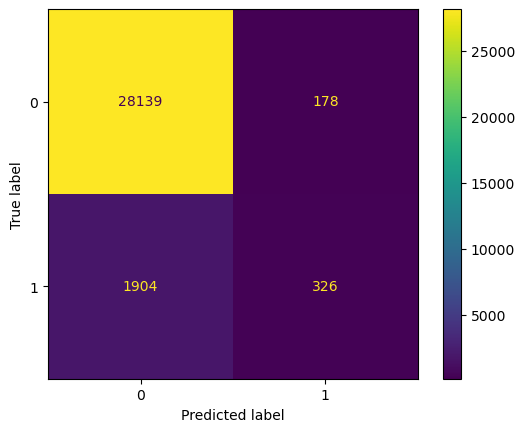

In [19]:
ConfusionMatrixDisplay.from_estimator(best_model_gb, X_test, y_test);

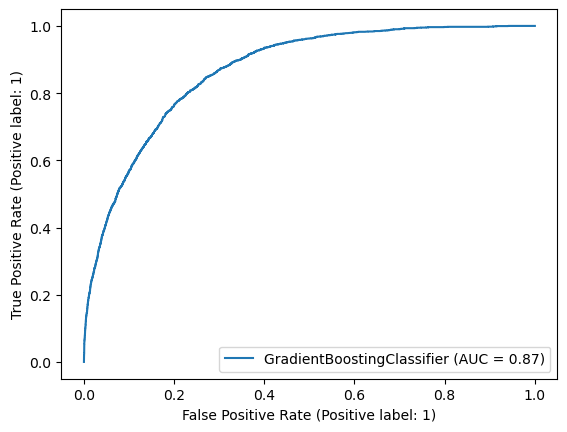

In [20]:
RocCurveDisplay.from_estimator(best_model_gb, X_test, y_test);

### **Gradient Boosting Model (with only columns selected at EDA process)**

In [21]:
drop_columns = ['HOUSEHOLD_SUMMARY', 'MILITARY', 'CERT_REQ', 'TROUB_BATHE',
                'TROUB_HEAR', 'TROUB_SEE', 'TROUB_ALONE', 'TROUB_WALK',
                'TROUB_CONC', 'DIS_INC', 'OTH_DIS_INC', 'OTH_INC']

X_train_dropped = X_train.drop(columns = drop_columns)
X_test_dropped = X_test.drop(columns = drop_columns)

In [22]:
gb = GradientBoostingClassifier()

params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.2, 0.3]
}

# Instantiate GridSearchCV
gs_gb = GridSearchCV(gb, 
                     param_grid = params, 
                     cv = 5, 
                     n_jobs = -1,
                     scoring = 'balanced_accuracy')

# Fit GridSearchCV to training data
gs_gb.fit(X_train_dropped, y_train)

# Print the best score and best parameters
print(f'Best score: {gs_gb.best_score_}')
print(f'Best parameters: {gs_gb.best_params_}')

# Get the best model from GridSearchCV
best_model = gs_gb.best_estimator_

# Training score
train_score = best_model.score(X_train_dropped, y_train)
print(f'Training score: {train_score}')

# Test score
test_score = best_model.score(X_test_dropped, y_test)
print(f'Test score: {test_score}')

Best score: 0.5712587099162745
Best parameters: {'learning_rate': 0.3, 'n_estimators': 200}
Training score: 0.9356467651512052
Test score: 0.9320064163420303


In [23]:
pred_gb = best_model.predict(X_test_dropped)

In [24]:
# Balanced accuracy
balanced_acc_gb = balanced_accuracy_score(y_test, pred_gb)

print(f'Balanced Accuracy: {balanced_acc_gb}')

# F1 score
f1_gb = f1_score(y_test, pred_gb)

print(f'F1 score: {f1_gb}')

Balanced Accuracy: 0.5702460262901226
F1 score: 0.23947272061515928


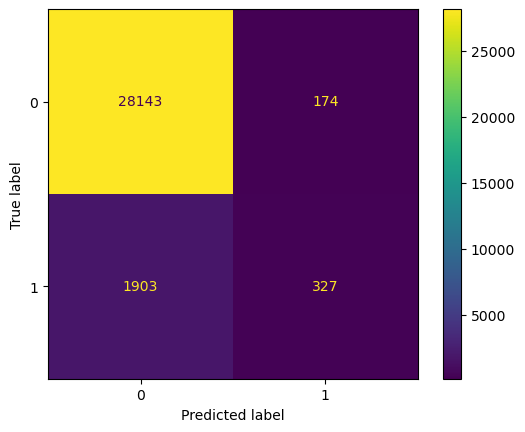

In [25]:
ConfusionMatrixDisplay.from_estimator(best_model, X_test_dropped, y_test);

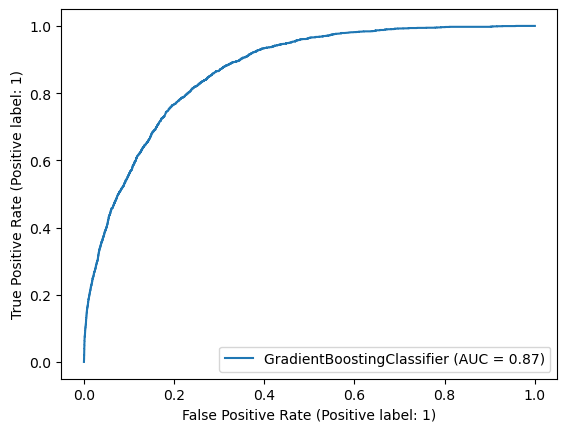

In [26]:
RocCurveDisplay.from_estimator(best_model, X_test_dropped, y_test);

### **Gradient Boosting Model with Data Resampling (all columns)**

In [27]:
# Perform Random Oversampling
ros = RandomOverSampler(random_state = 42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [28]:
gb = GradientBoostingClassifier()

params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.2, 0.3]
}

# Instantiate GridSearchCV
gs_gb = GridSearchCV(gb, 
                     param_grid = params, 
                     cv = 5, 
                     n_jobs = -1,
                     scoring = 'balanced_accuracy')

# Fit GridSearchCV to training data
gs_gb.fit(X_resampled, y_resampled)

print(f'Best score: {gs_gb.best_score_}')
print(f'Best parameters: {gs_gb.best_params_}')

# Get the best model from GridSearchCV
best_model_resampled = gs_gb.best_estimator_

# Training score
train_score = best_model_resampled.score(X_resampled, y_resampled)
print(f'Training score: {train_score}')

# Test score
test_score = best_model_resampled.score(X_test, y_test)
print(f'Test score: {test_score}')

# Make predictions on test data
pred_resampled = best_model_resampled.predict(X_test)

Best score: 0.803195154539822
Best parameters: {'learning_rate': 0.3, 'n_estimators': 200}
Training score: 0.8070929750059593
Test score: 0.7495662421841752


In [29]:
# Balanced accuracy
balanced_acc_resampled = balanced_accuracy_score(y_test, pred_resampled)
print(f'Balanced Accuracy: {balanced_acc_resampled}')

# F1 score
f1_resampled = f1_score(y_test, pred_resampled)
print(f'F1 score: {f1_resampled}')

Balanced Accuracy: 0.7874628782310964
F1 score: 0.3265845070422535


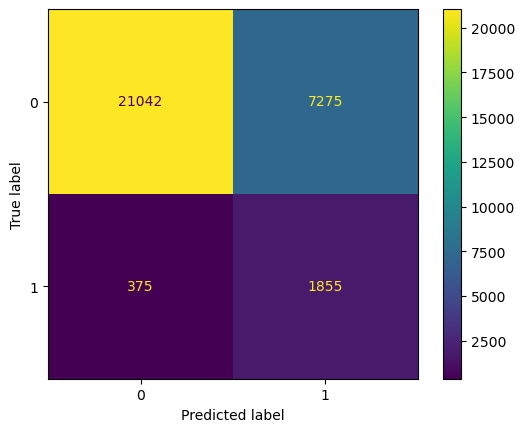

In [30]:
cm = ConfusionMatrixDisplay.from_estimator(best_model_resampled, X_test, y_test)
cm.figure_.savefig('../images/classification_models/ConfusionMatrixDisplayGBMforALL')

cm;

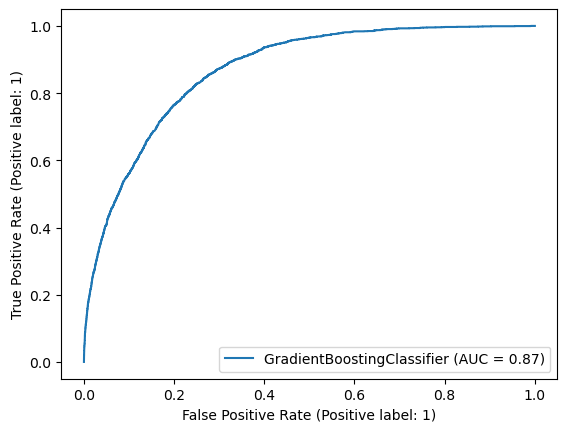

In [31]:
RocCurveDisplay.from_estimator(best_model_resampled, X_test, y_test);

### **Gradient Boosting Model with Data Resampling (with only columns selected at EDA process)**

In [32]:
# Perform Random Oversampling
ros = RandomOverSampler(random_state = 42)
X_resampled_dropped, y_resampled = ros.fit_resample(X_train_dropped, y_train)

In [33]:
gb = GradientBoostingClassifier()

params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.2, 0.3]
}

# Instantiate GridSearchCV
gs_gb = GridSearchCV(gb, 
                     param_grid = params, 
                     cv = 5, 
                     n_jobs = -1, 
                     scoring = 'balanced_accuracy')

# Fit GridSearchCV to training data
gs_gb.fit(X_resampled_dropped, y_resampled)

print(f'Best score: {gs_gb.best_score_}')
print(f'Best parameters: {gs_gb.best_params_}')

# Get the best model from GridSearchCV
best_model_resampled_dropped = gs_gb.best_estimator_

# Training score
train_score = best_model_resampled_dropped.score(X_resampled_dropped, y_resampled)
print(f'Training score: {train_score}')

# Test score
test_score = best_model_resampled_dropped.score(X_test_dropped, y_test)
print(f'Test score: {test_score}')

# Make predictions on test data
pred_resampled_dropped = best_model_resampled_dropped.predict(X_test_dropped)

Best score: 0.80333637253356
Best parameters: {'learning_rate': 0.3, 'n_estimators': 200}
Training score: 0.8070885606575613
Test score: 0.7483222575048286


In [34]:
# Balanced accuracy
balanced_acc_resampled_dropped = balanced_accuracy_score(y_test, pred_resampled_dropped)
print(f'Balanced Accuracy: {balanced_acc_resampled_dropped}')

# F1 score
f1_resampled_dropped = f1_score(y_test, pred_resampled_dropped)
print(f'F1 score: {f1_resampled_dropped}')

Balanced Accuracy: 0.7876181352341707
F1 score: 0.32596878835700505


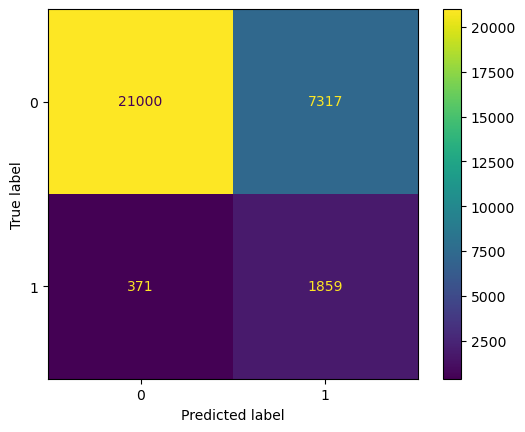

In [35]:
cm_eda = ConfusionMatrixDisplay.from_estimator(best_model_resampled_dropped, X_test_dropped, y_test);
cm_eda.figure_.savefig('../images/classification_models/ConfusionMatrixDisplayGBMforEDA')

cm_eda;

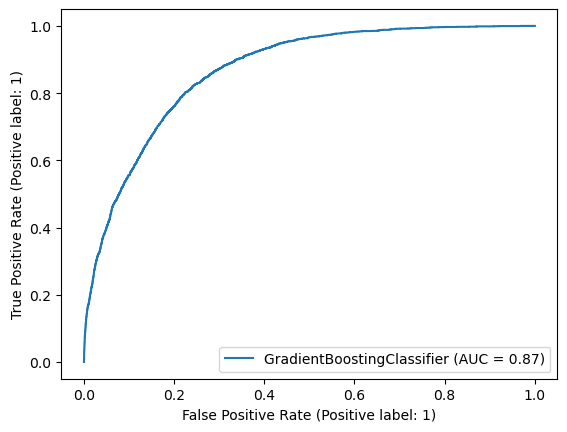

In [36]:
RocCurveDisplay.from_estimator(best_model_resampled_dropped, X_test_dropped, y_test);

## **Feature Importances**

**Note:** Gradient Boosting Model with Data Resampling (all columns) and Gradient Boosting Model with Data Resampling (with only columns selected at EDA process) both models performed very well and both balanced accuracy and f1 scores are very similart for the models. So, we decided to do the feature importance for both best performing models.

In [37]:
# Get feature importances for Gradient Boosting Model with Data Resampling (all columns)
importance = best_model_resampled.feature_importances_

# Create a list of column names
column_names = X_train.columns

# Sort feature importances in descending order
indices = np.argsort(importance)[::-1]

# Print top 10 feature ranking
print("GBM's Top 10 Feature Ranking:")
for f in range(10):
    print(f"{f+1}. Feature '{column_names[indices[f]]}' ({importance[indices[f]]})")

GBM's Top 10 Feature Ranking:
1. Feature 'EARN_TOTAL' (0.4600157620829426)
2. Feature 'AGE' (0.1167404507678271)
3. Feature 'PRIV_INS' (0.11561912991885646)
4. Feature 'FAM_RELATIONSHIP' (0.07808574338836607)
5. Feature 'OUT_POCKET_NONPREM' (0.03668067775240402)
6. Feature 'TAX_FILE_STAT' (0.031287169187024164)
7. Feature 'FT_PT' (0.018791855015905308)
8. Feature 'RACE' (0.018331242680007583)
9. Feature 'IMMIGR_YR' (0.01538626375421376)
10. Feature 'OUT_POCKET_OC' (0.013004191869620782)


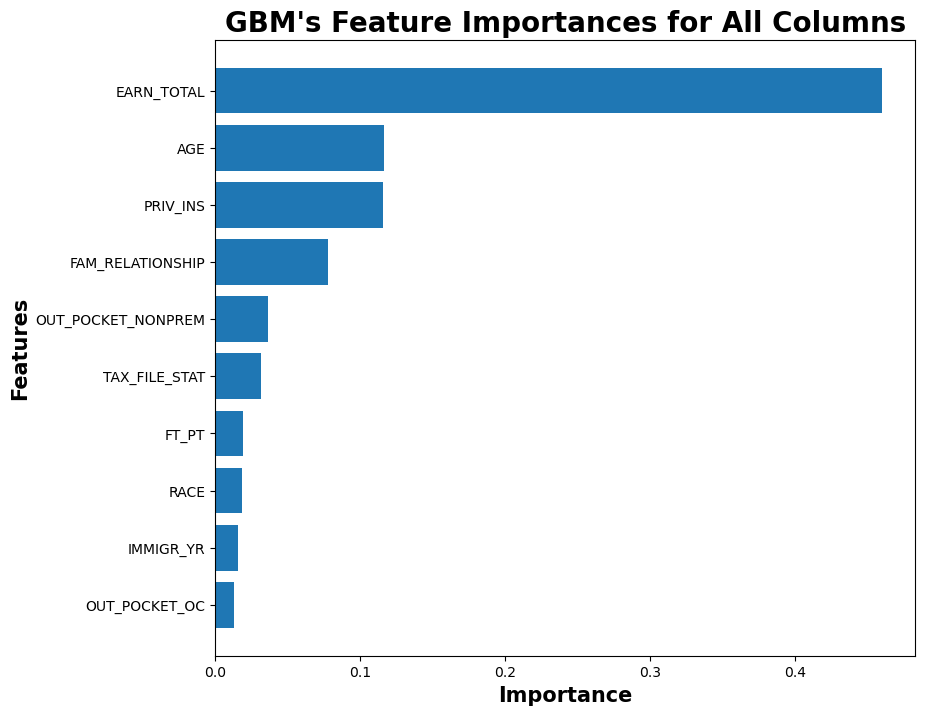

In [38]:
# Plot feature importances for Gradient Boosting Model with Data Resampling (all columns)
plt.figure(figsize = (10, 8))
plt.title("GBM's Feature Importances for All Columns", size = 20, fontweight = 'bold')
plt.barh(range(10), importance[indices[:10]][::-1], align = "center")
plt.yticks(range(10), [column_names[i] for i in indices[:10]][::-1], rotation = 0)
plt.xlabel("Importance", size = 15, fontweight = 'bold')
plt.ylabel("Features", size = 15, fontweight = 'bold')
plt.subplots_adjust(left = 0.2) 
plt.savefig('../images/classification_models/FeatureImportancesGBMforALL', bbox_inches = 'tight')
plt.show()

In [39]:
# Get feature importances for Gradient Boosting Model with Data Resampling 
# (with only columns selected at EDA process)
importance = best_model_resampled_dropped.feature_importances_

# Create a list of column names
column_names = X_train_dropped.columns

# Sort feature importances in descending order
indices = np.argsort(importance)[::-1]

# Print top 10 feature ranking
print("GBM's Top 10 Feature Ranking for EDA Columns:")
for f in range(10):
    print(f"{f+1}. Feature '{column_names[indices[f]]}' ({importance[indices[f]]})")

GBM's Top 10 Feature Ranking for EDA Columns:
1. Feature 'EARN_TOTAL' (0.460865937625794)
2. Feature 'AGE' (0.12810828472801153)
3. Feature 'PRIV_INS' (0.11533633194773027)
4. Feature 'FAM_RELATIONSHIP' (0.08154240682045866)
5. Feature 'OUT_POCKET_NONPREM' (0.03612001308729917)
6. Feature 'TAX_FILE_STAT' (0.026309114380802533)
7. Feature 'FT_PT' (0.02001978194918693)
8. Feature 'RACE' (0.015367933430830287)
9. Feature 'OUT_POCKET_OC' (0.014523282162311156)
10. Feature 'IMMIGR_YR' (0.013602203119139929)


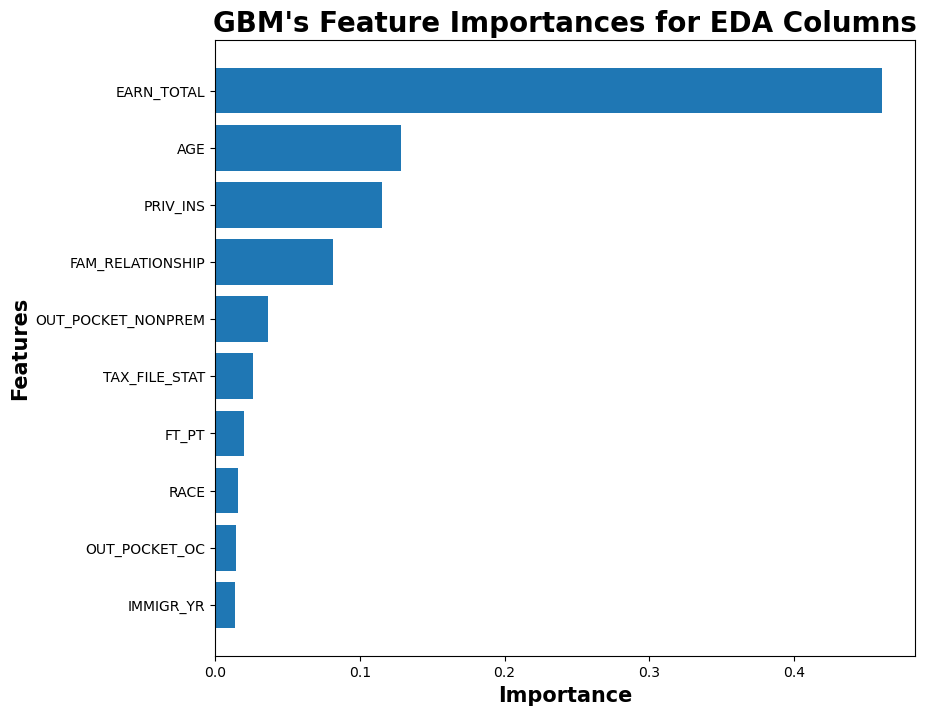

In [40]:
# Plot feature importances for Gradient Boosting Model with Data Resampling 
# (with only columns selected at EDA process)
plt.figure(figsize = (10, 8))
plt.title("GBM's Feature Importances for EDA Columns", size = 20, fontweight = 'bold')
plt.barh(range(10), importance[indices[:10]][::-1], align = "center")
plt.yticks(range(10), [column_names[i] for i in indices[:10]][::-1], rotation = 0)
plt.xlabel("Importance", size = 15, fontweight = 'bold')
plt.ylabel("Features", size = 15, fontweight = 'bold')
plt.subplots_adjust(left = 0.2)
plt.savefig('../images/classification_models/FeatureImportancesGBMforEDA', bbox_inches = 'tight')
plt.show()

## **Conclusion**

As earlier expected, the **most important feature** in predicting the target variable is **'EARN_TOTAL'** with a feature importance score of 0.4609. This indicates that total wage and salary earnings have the highest impact on the model's predictions. **'AGE'** is the **second most important feature** with a score of 0.1281, suggesting that age also plays a significant role in poverty prediction. **'PRIV_INS' (private insurance)** is the **third most important feature** with a score of 0.1154, indicating that the presence or absence of private insurance has a notable influence on the predictions. **'FAM_RELATIONSHIP'** is the **fourth most important feature** with a score of 0.0815. This suggests that the family relationship status has some predictive power in the model. Other features, such as **'OUT_POCKET_NONPREM'** (out-of-pocket expenditures for non-premium medical care), **'FT_PT'** (full-time or part-time employment), **'TAX_FILE_STAT'** (tax filing status), **'RACE'**, **'OUT_POCKET_OC'** (out-of-pocket expenditures for over-the-counter health-related spending), and **'IMMIGR_YR'** (year of immigration), also contribute to the model's predictions but to a lesser extent. However, they are still significant and **included in the top 10 features of importance**. So, overall, **health-related features** are also **very important** in the process of predicting the poverty status of a person.

Moreover, regarding the model selection, based on the confusion matrix above, the model selection should be done based on the needs of the organization at the time since the two best-performing models have different distributions of False Negatives and False Positives. In this model evaluation, one (positive) indicates 'in poverty' and zero (negative) indicates 'not in poverty.' The Gradient Boosting Model with Data Resampling (all columns) has 7276 False Positives and 375 False Negatives, while the Gradient Boosting Model with Data Resampling (with only columns selected at the EDA process) has 7318 False Positives and 371 False Negatives. Therefore, if the goal is to minimize False Positives, the Gradient Boosting Model with Data Resampling (all columns) should be used. On the other hand, if the goal is to minimize False Negatives, the Gradient Boosting Model with Data Resampling (with only columns selected at the EDA process) should be used. This goal will differ based on the program that the organization/government is considering. For example, if the funding is very limited, the goal might be to help only people in need, prioritizing False Positives. Conversely, for other programs with larger funding, the goal might be to assist as many people as possible, making False Negatives a more significant issue.